In [1]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importar el archivo
path = "/home/luii/Documents/Mineria de datos"
file = "proyecto Final/xsqYiKoe"
data = pd.read_csv(path + "/" + file)
data.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,09/12/2020,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,08/12/2020,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,07/12/2020,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,06/12/2020,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,05/12/2020,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


In [3]:
import statsmodels.formula.api as smf 

In [4]:
ml = smf.ols(formula = "cases~deaths", data=data).fit()

In [5]:
ml.params

Intercept    154.312871
deaths        38.411694
dtype: float64

In [6]:
# validacion del modelo
# coeficiente de determinacion ajustado (R^2 ajustado)
# para cero no hay relacion 1 si hay relacion
validacion = ml.rsquared_adj
print("El modelo tiene una presicion de: " + str(round(validacion*100,2)) + "%")

El modelo tiene una presicion de: 55.29%


In [7]:
# validacion inversa por valores p
# entre mas cerca de 0 mas validado estará y lo mejor es que esten debajo de 0.5
ml.pvalues

Intercept    1.001002e-16
deaths       0.000000e+00
dtype: float64

In [8]:
# validacion matematica = prediccion de variable en la simulacion
prediccion_ventas = ml.predict(pd.DataFrame(data["deaths"]))
prediccion_ventas

0        384.783034
1        500.018115
2        576.841503
3        538.429809
4        768.899971
            ...    
61895    154.312871
61896    192.724565
61897    154.312871
61898    154.312871
61899    154.312871
Length: 61900, dtype: float64

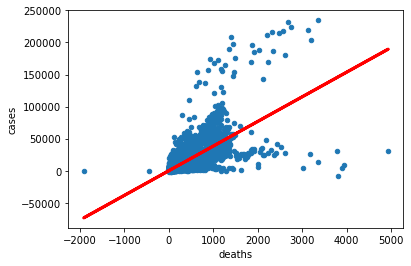

In [9]:
# Impresión del modelo

%matplotlib inline
data.plot(kind="scatter", x="deaths", y="cases")
plt.plot(pd.DataFrame(data["deaths"]), prediccion_ventas, c="red", linewidth=3)

In [10]:
# conclusión

# 1. La relación entre los casos confirmados y las muertes por COVID-19, según la regresión lineal,
# es de 0.55, esto puede ocurri por la fecha en la que se confirmaron los casos, puesto que al principio
# de la pandemia es sabido que murió más gente de la que muere hoy en día.

# Podemos incluir otra variable para ver si es la que determina la cantidad de muertes, o crear una
# regresión lineal múltiple para ver el comportamiento del modelo con diferentes variables en conjunto.